In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Aggregate by hour

- Aggregate raw data into hourly close/high/low prices
- Make sure each time step has complete data
- sort by time and asset names

In [2]:
def process_data(data_dir, asset_names, time_scope, freq='1H'):
    df = {}
    
    for name in asset_names:
        fname = data_dir + name + '_' + time_scope + '_minute.csv'
        df[name] = process_single_asset(fname, name, freq)
    
    df_merge = merge_data(df, asset_names)
    
    return df_merge


In [3]:
def process_single_asset(fname, name, freq):
    df = pd.read_csv(fname)
    
    # add timestamp columns
    df = df.assign(dt=pd.to_datetime(df.t))
    
    # close price of each day 
    df_close = df[['c','dt']].groupby(pd.Grouper(key='dt',freq=freq)).last().reset_index()
    
    # high price of each day
    df_high = df[['h','dt']].groupby(pd.Grouper(key='dt',freq=freq)).max().reset_index()
    
    # low price of each day
    df_low = df[['l','dt']].groupby(pd.Grouper(key='dt',freq=freq)).min().reset_index()
    
    # merge 
    df_merge = pd.merge(df_close, df_high, on='dt')
    df_merge = pd.merge(df_merge, df_low, on='dt')
    
    # drop null and change column names
    df_merge = df_merge.dropna().rename(columns={'c': 'close', 'h': 'high', 'l': 'low'})
    
    # add asset name
    df_merge = df_merge.assign(ticker=name)
    
    
    return df_merge
    
    
    

In [4]:
def merge_data(df, asset_names):
    '''
    Keep datetime with complete data
    '''
    
    dt = df[asset_names[0]][['dt']]
    
    for name in asset_names[1:]:
        dt = pd.merge(dt, df[name][['dt']], how='inner', on='dt')
    
    df_merge = pd.merge(dt, df[asset_names[0]], how='inner', on='dt')
    for name in asset_names[1:]:
        df_cut = pd.merge(dt, df[name], how='inner', on='dt')
        df_merge = pd.concat([df_merge, df_cut])
    
    
    return df_merge
    

## process data

In [5]:
data_dir = 'historical_price/'
asset_names = ['AAL','CVS','FDX','F','AIG','CAT']
time_scope = '2015-12-30_2021-02-21'

In [6]:
df = process_data(data_dir, asset_names, time_scope)

In [7]:
df.head()

,dt,close,high,low,ticker
0,2015-12-30 14:00:00,42.8300,43.640,42.7799,AAL
1,2015-12-30 15:00:00,42.7500,42.880,42.4600,AAL
2,2015-12-30 16:00:00,42.8800,42.940,42.6900,AAL
3,2015-12-30 17:00:00,43.0400,43.089,42.8600,AAL
4,2015-12-30 18:00:00,42.9501,43.110,42.9400,AAL


## summary

In [8]:
df[['ticker','dt']].groupby(df.ticker).agg(
    {'dt': ['min','max','count']}
)

dt                           
                       min                 max  count
ticker                                               
AAL    2015-12-30 14:00:00 2021-02-17 21:00:00  11157
AIG    2015-12-30 14:00:00 2021-02-17 21:00:00  11157
CAT    2015-12-30 14:00:00 2021-02-17 21:00:00  11157
CVS    2015-12-30 14:00:00 2021-02-17 21:00:00  11157
F      2015-12-30 14:00:00 2021-02-17 21:00:00  11157
FDX    2015-12-30 14:00:00 2021-02-17 21:00:00  11157

## set index

In [9]:
df_sort = df.set_index(['dt','ticker'])
df_sort = df_sort.sort_index()

In [10]:
df_sort[:50]

close      high       low
dt                  ticker                              
2015-12-30 14:00:00 AAL      42.8300   43.6400   42.7799
                    AIG      62.6300   62.6750   62.2500
                    CAT      69.3500   69.6300   68.5500
                    CVS      99.1300   99.6000   99.1000
                    F        14.2350   14.2600   14.1700
                    FDX     148.5950  149.2500  148.0100
2015-12-30 15:00:00 AAL      42.7500   42.8800   42.4600
                    AIG      62.6600   62.7300   62.5000
                    CAT      69.2500   69.3999   68.9600
                    CVS      98.9000   99.3100   98.7300
                    F        14.2100   14.2500   14.1500
                    FDX     148.6400  148.9600  148.1010
2015-12-30 16:00:00 AAL      42.8800   42.9400   42.6900
                    AIG      62.9600   63.0250   62.6600
                    CAT      69.4300   69.5500   69.2200
                    CVS      99.0800   99.1500   98.8800
                    F        14.2200   14.2500   14.1900
                    FDX     148.8100  149.0600  148.6250
2015-12-30 17:00:00 AAL      43.0400   43.0890   42.8600
                    AIG      62.8250   62.9700   62.7300
                    CAT      69.0450   69.4500   69.0000
                    CVS      99.0000   99.1500   98.9900
                    F        14.2150   14.2500   14.1800
                    FDX     148.9853  148.9853  148.7320
2015-12-30 18:00:00 AAL      42.9501   43.1100   42.9400
                    AIG      62.9700   63.0000   62.7900
                    CAT      69.1304   69.2500   69.0201
                    CVS      99.0850   99.0900   98.9300
                    F        14.2249   14.2500   14.2100
                    FDX     149.7599  149.7600  148.9600
2015-12-30 19:00:00 AAL      42.9211   43.0900   42.9201
                    AIG      62.7400   62.9600   62.7300
                    CAT      68.9700   69.1600   68.9665
                    CVS      99.0634   99.1200   98.8700
                    F        14.2200   14.2400   14.2100
                    FDX     149.4200  150.1400  149.4200
2015-12-30 20:00:00 AAL      42.8000   42.9400   42.6800
                    AIG      62.4700   62.7950   62.4700
                    CAT      68.6800   69.0000   68.5700
                    CVS      98.7300   99.2300   98.7100
                    F        14.1700   14.2200   14.1200
                    FDX     149.1900  149.8100  149.0000
2015-12-30 21:00:00 AAL      42.8000   42.8100   42.8000
                    AIG      62.5100   62.5100   62.4600
                    CAT      68.6900   68.6900   68.6900
                    CVS      98.7400   98.7400   98.7400
                    F        14.1700   14.1900   14.1600
                    FDX     149.1800  149.1800  149.1800
2015-12-31 14:00:00 AAL      42.1000   42.6000   42.0400
                    AIG      62.2300   62.4750   62.1300

## write to file

In [16]:
fname = 'data/stock_price_tr.csv'
df_sort[:60000].to_csv(fname)

In [17]:
fname = 'data/stock_price_ts.csv'
df_sort[60000:].to_csv(fname)

## plot

In [12]:
df_prc = pd.read_csv(fname, parse_dates=['dt'], index_col=['dt', 'ticker'], infer_datetime_format=True)
df_prc[:10]

close      high       low
dt                  ticker                             
2015-12-30 14:00:00 AAL      42.830   43.6400   42.7799
                    AIG      62.630   62.6750   62.2500
                    CAT      69.350   69.6300   68.5500
                    CVS      99.130   99.6000   99.1000
                    F        14.235   14.2600   14.1700
                    FDX     148.595  149.2500  148.0100
2015-12-30 15:00:00 AAL      42.750   42.8800   42.4600
                    AIG      62.660   62.7300   62.5000
                    CAT      69.250   69.3999   68.9600
                    CVS      98.900   99.3100   98.7300

In [13]:
temp = df_prc.reset_index()

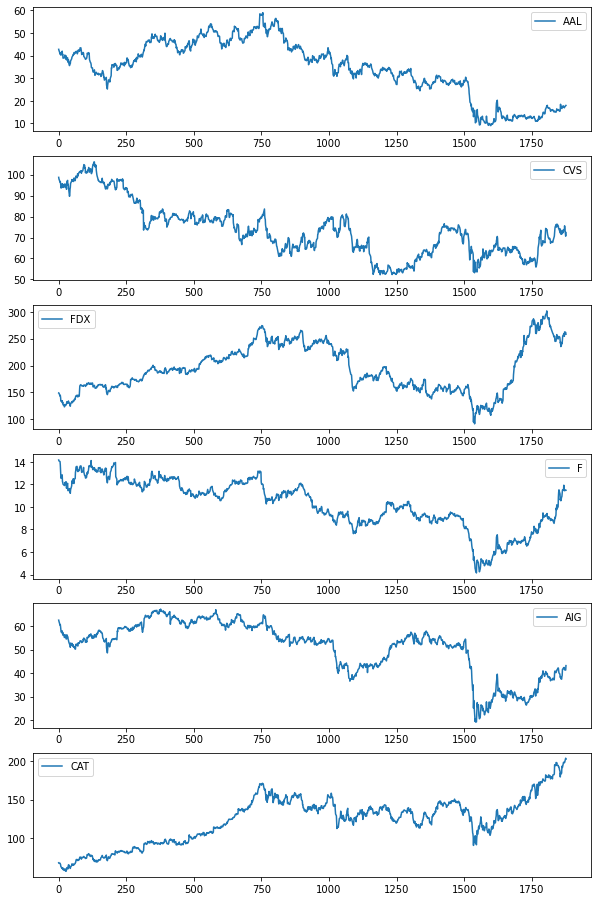

In [15]:
asset_names = ['AAL','CVS','FDX','F','AIG','CAT']
fig, axs = plt.subplots(len(asset_names),1, figsize=(10,16))

for i in range(len(asset_names)):
    name = asset_names[i]
    df_i = temp.loc[temp.ticker==name]
    df_i = df_i.groupby(pd.Grouper(key='dt',freq='1D')).last().reset_index().dropna()
    
    axs[i].plot(df_i.close, label=name)
    axs[i].legend()

# Aggregate by day

## process data

In [107]:
data_dir = 'historical_price/'
asset_names = ['AAL','CVS','FDX','F','AIG','CAT']
time_scope = '2015-12-30_2021-02-21'

In [108]:
df = process_data(data_dir, asset_names, time_scope, freq='1D')

In [109]:
df.head()

,dt,close,high,low,ticker
0,2015-12-30,42.76,43.64,42.46,AAL
1,2015-12-31,42.00,42.82,41.83,AAL
2,2016-01-04,40.93,42.35,40.30,AAL
3,2016-01-05,40.55,41.49,39.95,AAL
4,2016-01-06,41.50,41.70,39.78,AAL


## summary

In [110]:
df[['ticker','dt']].groupby(df.ticker).agg(
    {'dt': ['min','max','count']}
)

dt                 
              min        max count
ticker                            
AAL    2015-12-30 2021-02-17  1296
AIG    2015-12-30 2021-02-17  1296
CAT    2015-12-30 2021-02-17  1296
CVS    2015-12-30 2021-02-17  1296
F      2015-12-30 2021-02-17  1296
FDX    2015-12-30 2021-02-17  1296

## set index

In [111]:
df_sort = df.set_index(['dt','ticker'])
df_sort = df_sort.sort_index()

In [95]:
df_sort[:50]

close     high      low
dt         ticker                           
2015-12-30 AIG     62.5100  63.0250  62.2500
           CAT     68.6900  69.6300  68.5500
           F       14.1900  14.2600  14.1200
2015-12-31 AIG     62.0100  62.7400  61.9600
           CAT     68.0000  69.1000  67.7200
           F       14.1000  14.2000  14.0400
2016-01-04 AIG     60.4000  61.1100  59.8200
           CAT     68.1500  68.2700  65.7200
           F       14.0600  14.0600  13.7400
2016-01-05 AIG     60.6400  60.9500  60.0000
           CAT     66.9810  68.6500  66.4200
           F       13.7500  14.0700  13.5100
2016-01-06 AIG     59.6682  60.6703  58.8700
           CAT     66.2600  66.9000  65.6200
           F       13.1300  13.7500  13.0500
2016-01-07 AIG     58.2900  59.5000  58.0200
           CAT     63.7200  66.4700  63.6500
           F       12.6800  13.5000  12.6000
2016-01-08 AIG     57.4000  59.4800  57.3000
           CAT     63.0100  64.9700  62.9300
           F       12.5200  13.1000  12.5000
2016-01-11 AIG     57.6900  58.0000  56.8400
           CAT     61.5500  63.7200  60.8500
           F       12.7700  12.8200  12.5500
2016-01-12 AIG     58.8400  58.8400  57.3000
           CAT     61.5700  62.6900  60.3900
           F       12.5800  13.1000  12.3500
2016-01-13 AIG     56.6700  59.8700  56.5000
           CAT     61.0000  62.7600  60.3900
           F       12.2000  12.8500  12.0600
2016-01-14 AIG     57.3000  57.8200  56.3800
           CAT     62.2700  62.9700  60.3800
           F       12.2300  12.4200  11.8200
2016-01-15 AIG     56.0100  56.4500  55.3131
           CAT     60.0000  62.5000  58.7500
           F       12.0300  12.2300  11.5800
2016-01-19 AIG     56.1300  57.2300  55.8400
           CAT     58.8500  61.0000  58.4800
           F       11.9500  12.2600  11.8200
2016-01-20 AIG     55.1500  55.7200  53.4900
           CAT     59.1800  59.3800  56.3600
           F       11.9400  12.0700  11.4700
2016-01-21 AIG     55.3100  56.1200  54.5400
           CAT     59.6900  60.4200  58.2500
           F       12.0000  12.2800  11.6500
2016-01-22 AIG     56.3500  56.9300  55.3100
           CAT     60.3000  62.5600  60.3000
           F       12.1700  12.3600  12.0100
2016-01-23 AIG     56.3500  56.3500  56.3500
           CAT     60.3700  60.3700  60.3000

## write to file

In [112]:
fname = 'data/stock_price_1D.csv'
df_sort.to_csv(fname)

## plot

In [113]:
temp = df_sort.reset_index()

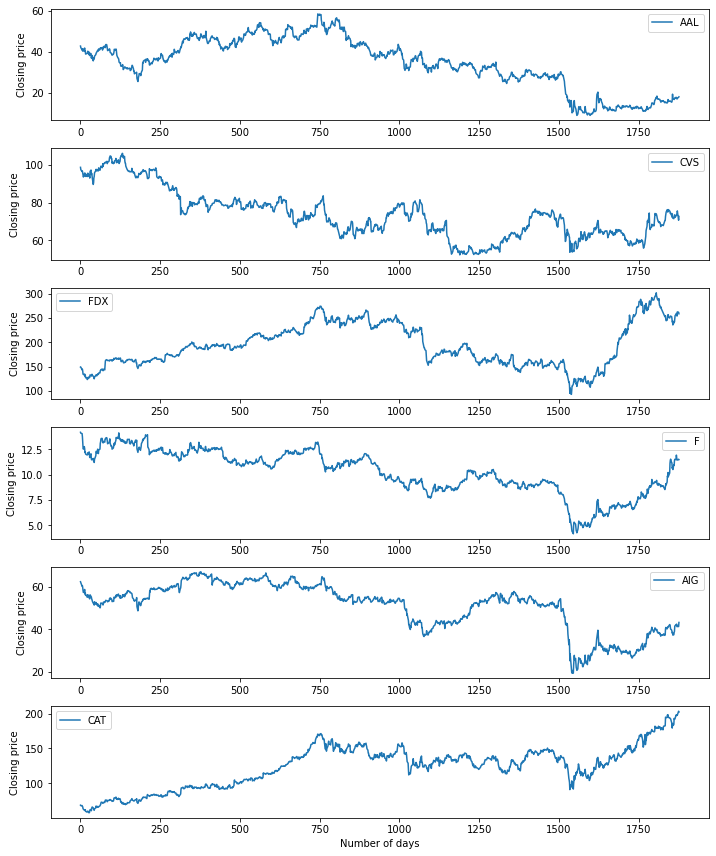

In [116]:
fig, axs = plt.subplots(len(asset_names),1, figsize=(10,12))

for i in range(len(asset_names)):
    name = asset_names[i]
    df_i = temp.loc[temp.ticker==name]
    df_i = df_i.groupby(pd.Grouper(key='dt',freq='1D')).last().reset_index().dropna()
    
    axs[i].plot(df_i.close, label=name)
    axs[i].legend()
    axs[i].set_ylabel('Closing price')

axs[-1].set_xlabel('Number of days')
fig.tight_layout()
fig.savefig('stock_price.png')